## K-means method
### Setting up for clustering analysis

In [1]:
import sklearn
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn import datasets

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-whitegrid');

<img src="k_means.png" width="600" height="500">

In [2]:
iris = datasets.load_iris()
X = iris.data[:, 1:3]
y = iris.target

X[0:10]

array([[3.5, 1.4],
       [3. , 1.4],
       [3.2, 1.3],
       [3.1, 1.5],
       [3.6, 1.4],
       [3.9, 1.7],
       [3.4, 1.4],
       [3.4, 1.5],
       [2.9, 1.4],
       [3.1, 1.5]])

In [3]:
pd.DataFrame(iris.data).columns

RangeIndex(start=0, stop=4, step=1)

In [4]:
X.shape

(150, 2)

In [5]:
y.shape

(150,)

### Ploting dataset

Text(0.5, 1.0, 'Ground Truth Classification')

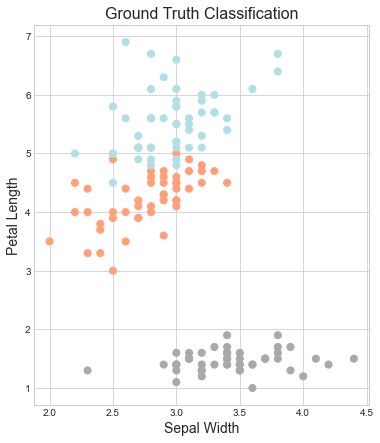

In [6]:
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.figure(figsize=(6,7));
plt.scatter(X[:,0], X[:,1], c=color_theme[iris.target],s=50)

plt.xlabel('Sepal Width',fontsize=14)
plt.ylabel('Petal Length',fontsize=14)
plt.title('Ground Truth Classification',fontsize=16)

## Building & running your model

In [7]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=1)

In [8]:
kmeans.cluster_centers_

array([[3.428     , 1.462     ],
       [3.03255814, 5.67209302],
       [2.75087719, 4.32807018]])

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
new_labels = kmeans.labels_
new_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1], dtype=int32)

### Visualizing k-means clustering with centroids

Text(0.5, 1.0, 'K-means Classification with Centroids')

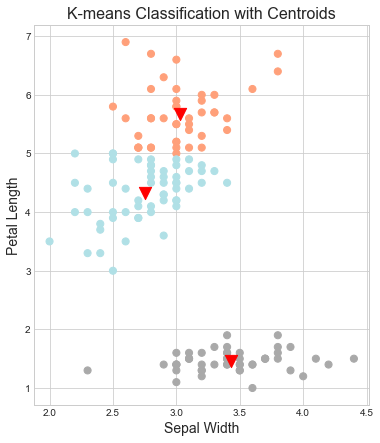

In [11]:
plt.figure(figsize=(6,7));
plt.scatter(X[:,0], X[:,1], c=color_theme[new_labels],
            cmap='gray',s=50)

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=150,c='red',marker="v")

plt.xlabel('Sepal Width',fontsize=14)
plt.ylabel('Petal Length',fontsize=14)
plt.title('K-means Classification with Centroids',fontsize=16)

## Plotting model outputs

In [12]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']
color_theme = np.array(['darkgray', 'lightsalmon', 'powderblue'])

Text(0.5, 1.0, 'K-Means Classification')

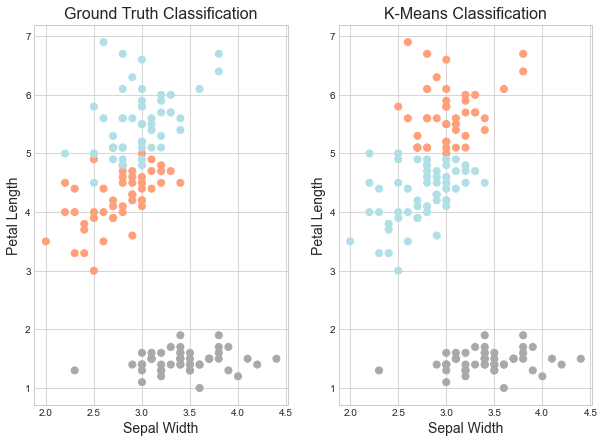

In [13]:
plt.figure(figsize=(10,7));

plt.subplot(1,2,1)
plt.scatter(y=iris_df.Petal_Length, x=iris_df.Sepal_Width,
            c=color_theme[y], s=50)

plt.xlabel('Sepal Width',fontsize=14)
plt.ylabel('Petal Length',fontsize=14)
plt.title('Ground Truth Classification',fontsize=16)

plt.subplot(1,2,2)
plt.scatter(y=iris_df.Petal_Length, x=iris_df.Sepal_Width,
            c=color_theme[new_labels], s=50)

plt.xlabel('Sepal Width',fontsize=14)
plt.ylabel('Petal Length',fontsize=14)
plt.title('K-Means Classification',fontsize=16)

### Swapping labels 

In [14]:
relabel = np.choose(kmeans.labels_, [0, 2, 1]).astype(np.int64)
relabel

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2])

Text(0.5, 1.0, 'K-Means Classification')

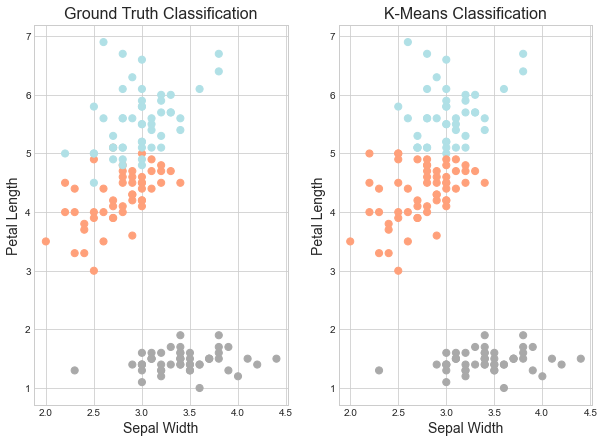

In [15]:
plt.figure(figsize=(10,7));

plt.subplot(1,2,1)
plt.scatter(x=iris_df.Sepal_Width, y=iris_df.Petal_Length,
            c=color_theme[y], s=50)

plt.xlabel('Sepal Width',fontsize=14)
plt.ylabel('Petal Length',fontsize=14)
plt.title('Ground Truth Classification',fontsize=16)

plt.subplot(1,2,2)
plt.scatter(x=iris_df.Sepal_Width, y=iris_df.Petal_Length,
            c=color_theme[relabel], s=50)

plt.xlabel('Sepal Width',fontsize=14)
plt.ylabel('Petal Length',fontsize=14)
plt.title('K-Means Classification',fontsize=16)

## Evaluate your clustering results

In [16]:
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.84      0.96      0.90        50
           2       0.95      0.82      0.88        50

    accuracy                           0.93       150
   macro avg       0.93      0.93      0.93       150
weighted avg       0.93      0.93      0.93       150

